In [4]:
import cv2

In [5]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Genuine signatures (flattened list)
gen_sign = [
    file for dataset in [
        glob.glob('Dataset_Signature_Final/Dataset/dataset1/real/*.*'),
        glob.glob('Dataset_Signature_Final/Dataset/dataset2/real/*.*'),
        glob.glob('Dataset_Signature_Final/Dataset/dataset3/real/*.*'),
        glob.glob('Dataset_Signature_Final/Dataset/dataset4/real1/*.*')
    ] for file in dataset
]

# Forged signatures (flattened list)
forg_sign = [
    file for dataset in [
        glob.glob('Dataset_Signature_Final/Dataset/dataset1/forge/*.*'),
        glob.glob('Dataset_Signature_Final/Dataset/dataset2/forge/*.*'),
        glob.glob('Dataset_Signature_Final/Dataset/dataset3/forge/*.*'),
        glob.glob('Dataset_Signature_Final/Dataset/dataset4/forge/*.*')
    ] for file in dataset
]



In [7]:
# Check how many genuine and forged signatures were loaded
print(f"Number of genuine signatures loaded: {len(gen_sign)}")
print(f"Number of forged signatures loaded: {len(forg_sign)}")

# Optionally, print some sample file paths to verify
if gen_sign:
    print(f"Sample genuine signature: {gen_sign[0]}")
if forg_sign:
    print(f"Sample forged signature: {forg_sign[0]}")


Number of genuine signatures loaded: 360
Number of forged signatures loaded: 360
Sample genuine signature: Dataset_Signature_Final/Dataset/dataset1/real\00100001.png
Sample forged signature: Dataset_Signature_Final/Dataset/dataset1/forge\02100001.png


In [8]:
import cv2

def load_images(file_list):
    images = []
    for files in file_list:
        for file in files:
            img = cv2.imread(file)
            images.append(img)
    return images


In [9]:
gen_imgs = load_images(gen_sign)
forg_imgs = load_images(forg_sign)

Displaying first genuine signature:


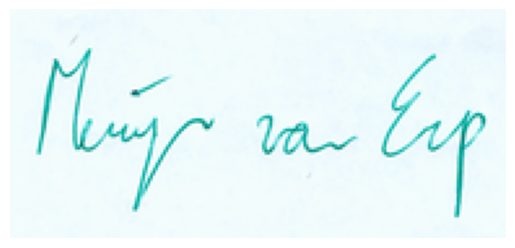

Displaying first forged signature:


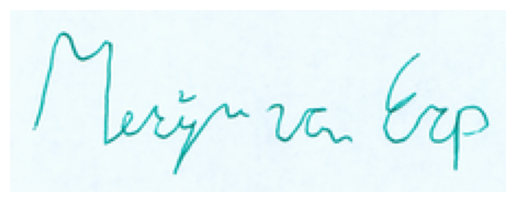

First genuine image shape: (88, 191, 3)
First forged image shape: (83, 226, 3)


In [10]:
import glob
import cv2
import matplotlib.pyplot as plt
import os

# Function to load images and return a list of valid images
def load_images(base_paths):
    images = []
    for path in base_paths:
        # Only match image files by specifying extensions
        for img_path in glob.glob(path):
            # Check if the file is a valid image
            if img_path.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                img = cv2.imread(img_path)
                if img is not None:
                    images.append(img)  # Append the image itself, not just the path
                else:
                    print(f"Could not load image: {img_path}")
    return images

# Load genuine signatures (flattened list of images)
genuine_paths = [
    'Dataset_Signature_Final/Dataset/dataset1/real/*.*',
    'Dataset_Signature_Final/Dataset/dataset2/real/*.*',
    'Dataset_Signature_Final/Dataset/dataset3/real/*.*',
    'Dataset_Signature_Final/Dataset/dataset4/real1/*.*'
]
gen_imgs = load_images(genuine_paths)

# Load forged signatures (flattened list of images)
forged_paths = [
    'Dataset_Signature_Final/Dataset/dataset1/forge/*.*',
    'Dataset_Signature_Final/Dataset/dataset2/forge/*.*',
    'Dataset_Signature_Final/Dataset/dataset3/forge/*.*',
    'Dataset_Signature_Final/Dataset/dataset4/forge/*.*'
]
forg_imgs = load_images(forged_paths)

# Function to display an image
def display_image(image):
    if image is None:
        print("Error: Image is None.")
        return

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide axes
    plt.show()

# Display the first genuine signature image
if gen_imgs:  # Check if the list is not empty
    print("Displaying first genuine signature:")
    display_image(gen_imgs[0])  # Display the first image
else:
    print("No genuine signature images found.")

# Display the first forged signature image
if forg_imgs:  # Check if the list is not empty
    print("Displaying first forged signature:")
    display_image(forg_imgs[0])  # Display the first image
else:
    print("No forged signature images found.")

# Print the first image data
if gen_imgs:
    print(f"First genuine image shape: {gen_imgs[0].shape}")  # Prints shape of the image
else:
    print("No genuine images available.")

if forg_imgs:
    print(f"First forged image shape: {forg_imgs[0].shape}")  # Prints shape of the image
else:
    print("No forged images available.")


In [11]:
print(gen_imgs[0])

[[[252 252 244]
  [252 252 244]
  [252 252 244]
  ...
  [253 251 239]
  [253 251 241]
  [253 252 242]]

 [[252 252 244]
  [252 252 244]
  [252 252 244]
  ...
  [253 252 241]
  [253 251 240]
  [253 252 242]]

 [[252 252 243]
  [252 252 243]
  [252 252 244]
  ...
  [253 251 240]
  [253 251 239]
  [253 251 240]]

 ...

 [[252 252 243]
  [253 252 242]
  [253 252 241]
  ...
  [253 252 242]
  [253 252 242]
  [253 252 242]]

 [[252 252 243]
  [252 252 243]
  [253 252 242]
  ...
  [253 252 241]
  [252 252 242]
  [252 252 243]]

 [[253 252 242]
  [252 252 242]
  [253 252 243]
  ...
  [253 251 240]
  [253 251 239]
  [253 252 241]]]


In [12]:
gen_imgs[0].shape

(88, 191, 3)

In [13]:
num_gen=sum([len(x) for x in gen_sign])
num_forg=sum([len(x) for x in forg_sign])
print(f'Number of real signatures :{ num_gen}')
print(f'Number of forged signatures :{ num_forg}')

Number of real signatures :20970
Number of forged signatures :21240


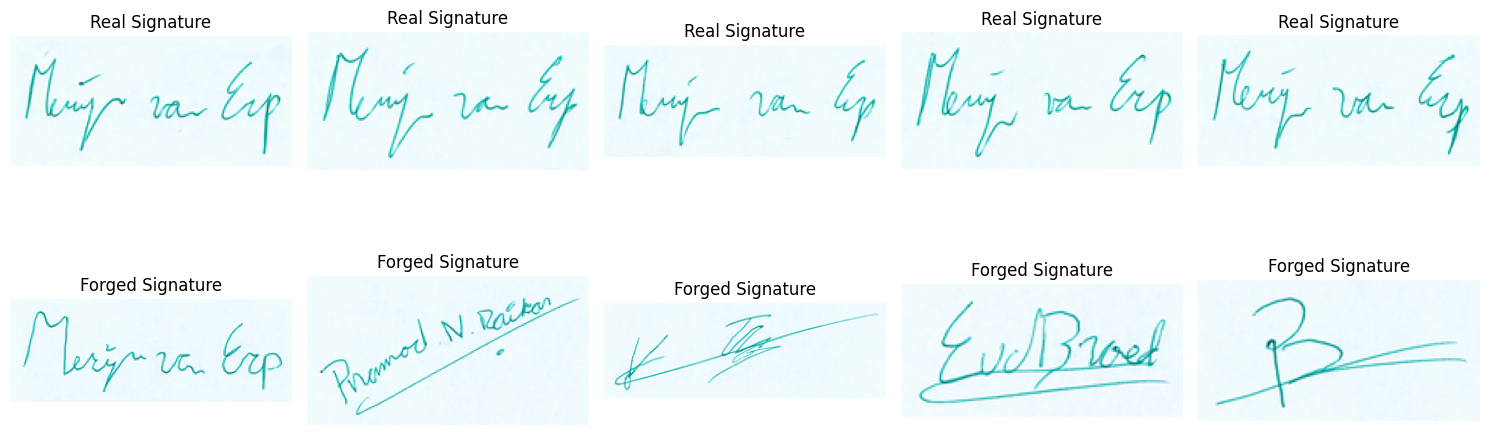

In [14]:
import matplotlib.pyplot as plt
import cv2

# Assuming gen_imgs and forg_imgs are already loaded and contain images
fig, ax = plt.subplots(2, 5, figsize=(15, 6))

# Display genuine signatures
for i in range(min(5, len(gen_imgs))):  # Use min to avoid IndexError
    ax[0, i].imshow(cv2.cvtColor(gen_imgs[i], cv2.COLOR_BGR2RGB))
    ax[0, i].set_title('Real Signature')
    ax[0, i].axis('off')  # Turn off axes

# Display forged signatures
for i in range(min(5, len(forg_imgs))):  # Use min to avoid IndexError
    ax[1, i].imshow(cv2.cvtColor(forg_imgs[i], cv2.COLOR_BGR2RGB))
    ax[1, i].set_title('Forged Signature')
    ax[1, i].axis('off')  # Turn off axes

plt.tight_layout()  # Adjust layout
plt.show()


In [15]:
image_data = pd.DataFrame(columns=['Type', 'Shape', 'Color Channels', 'Mean Pixel Value'])
                                 

In [16]:
# Initialize lists for genuine signatures
gen_shape = []
gen_color = []
gen_pixels = []

# Collect properties for genuine signatures
for img in gen_imgs:
    shape = img.shape
    gen_shape.append(shape)
    color_channels = shape[2] if len(shape) == 3 else 1
    gen_color.append(color_channels)
    mean_pixel_value = np.mean(img)
    gen_pixels.append(mean_pixel_value)

# Initialize lists for forged signatures
forg_shape = []
forg_color = []
forg_pixels = []

# Collect properties for forged signatures
for img in forg_imgs:
    shape = img.shape
    forg_shape.append(shape)
    color_channels = shape[2] if len(shape) == 3 else 1
    forg_color.append(color_channels)
    mean_pixel_value = np.mean(img)
    forg_pixels.append(mean_pixel_value)

# Initialize the DataFrame with the structure
image_data = pd.DataFrame(columns=['Type', 'Shape', 'Color Channels', 'Mean Pixel Value'])

# Collect data for real and forged signatures
data_list = []

# Append data for genuine signatures
for i in range(len(gen_shape)):
    data_list.append({'Type': 'Real',
                      'Shape': gen_shape[i],
                      'Color Channels': gen_color[i],
                      'Mean Pixel Value': gen_pixels[i]})

# Append data for forged signatures
for i in range(len(forg_shape)):
    data_list.append({'Type': 'Forged',
                      'Shape': forg_shape[i],
                      'Color Channels': forg_color[i],
                      'Mean Pixel Value': forg_pixels[i]})

# Convert the list of dictionaries to a DataFrame
image_data = pd.DataFrame(data_list)

# Output to check
print(image_data)

       Type           Shape  Color Channels  Mean Pixel Value
0      Real    (88, 191, 3)               3        242.764537
1      Real    (90, 184, 3)               3        243.156039
2      Real    (80, 202, 3)               3        243.308932
3      Real    (90, 186, 3)               3        243.039865
4      Real    (90, 194, 3)               3        242.720103
..      ...             ...             ...               ...
715  Forged  (382, 1010, 3)               3        240.179306
716  Forged  (532, 1552, 3)               3        243.524036
717  Forged  (386, 1023, 3)               3        240.151832
718  Forged  (571, 1402, 3)               3        243.676428
719  Forged   (336, 965, 3)               3        238.301999

[720 rows x 4 columns]


In [17]:
image_data.head()

,Type,Shape,Color Channels,Mean Pixel Value
0,Real,"(88, 191, 3)",3,242.764537
1,Real,"(90, 184, 3)",3,243.156039
2,Real,"(80, 202, 3)",3,243.308932
3,Real,"(90, 186, 3)",3,243.039865
4,Real,"(90, 194, 3)",3,242.720103


In [18]:
image_data.tail()

,Type,Shape,Color Channels,Mean Pixel Value
715,Forged,"(382, 1010, 3)",3,240.179306
716,Forged,"(532, 1552, 3)",3,243.524036
717,Forged,"(386, 1023, 3)",3,240.151832
718,Forged,"(571, 1402, 3)",3,243.676428
719,Forged,"(336, 965, 3)",3,238.301999


In [19]:
image_data.shape

(720, 4)

In [20]:
#display summary statistics of image data
print(image_data.describe())

       Color Channels  Mean Pixel Value
count           720.0        720.000000
mean              3.0        243.039370
std               0.0          5.213333
min               3.0        226.423019
25%               3.0        239.804540
50%               3.0        242.563931
75%               3.0        247.552634
max               3.0        252.423212


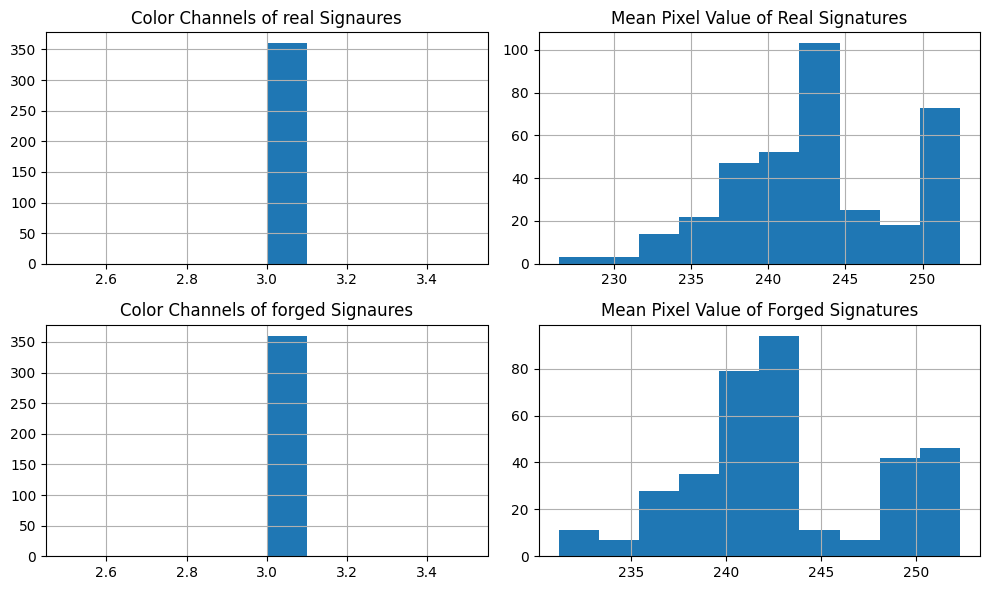

In [21]:
#create histograms to visualize the distribution of image data
fig,ax=plt.subplots(2,2,figsize=(10,6))
image_data[image_data['Type']=='Real']['Color Channels'].hist(ax=ax[0,0])
image_data[image_data['Type']=='Forged']['Color Channels'].hist(ax=ax[1,0])
image_data[image_data['Type']=='Real']['Mean Pixel Value'].hist(ax=ax[0,1])
image_data[image_data['Type']=='Forged']['Mean Pixel Value'].hist(ax=ax[1,1])

ax[0,0].set_title('Color Channels of real Signaures')
ax[0,1].set_title('Mean Pixel Value of Real Signatures')
ax[1,0].set_title('Color Channels of forged Signaures')
ax[1,1].set_title('Mean Pixel Value of Forged Signatures')

plt.tight_layout()
plt.show()




In [22]:
#RNN
import tensorflow
from tensorflow import keras
from keras import layers

In [23]:
#load the data
(train_data,train_labels),(test_data,test_labels)=keras.datasets.mnist.load_data()

In [24]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [25]:
# preprocess the data
train_data = train_data.reshape((train_data.shape[0], train_data.shape[1], train_data.shape[2]* 1)) 
test_data = test_data.reshape((test_data.shape[0], test_data.shape[1], test_data.shape[2]*1))
train_data = train_data.astype('float32')/255
test_data = test_data.astype('float32') / 255

In [26]:
#define the model
model=keras.Sequential([layers.LSTM(64,input_shape=(train_data.shape[1], train_data.shape[2])),layers.Dense(10,activation='softmax')])

c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
# Save the model in HDF5 format
model.save('my_model.h5')


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        23,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,458 (95.54 KB)

 Trainable params: 24,458 (95.54 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
#define callbacks
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

In [31]:
#train the model
history=model.fit(train_data,train_labels,batch_size=128,
                  epochs=10,validation_split=0.2,callbacks=[early_stop])

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5599 - loss: 1.3264 - val_accuracy: 0.8562 - val_loss: 0.4427
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8963 - loss: 0.3415 - val_accuracy: 0.9277 - val_loss: 0.2345
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9370 - loss: 0.2099 - val_accuracy: 0.9499 - val_loss: 0.1638
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9551 - loss: 0.1496 - val_accuracy: 0.9555 - val_loss: 0.1450
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9634 - loss: 0.1247 - val_accuracy: 0.9598 - val_loss: 0.1357
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9676 - loss: 0.1057 - val_accuracy: 0.9661 - val_loss: 0.1118
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9737 - loss: 0.0867 - val_accuracy: 0.9759 - val_loss: 0.0823
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9777 - loss: 0.0738 - val_accu

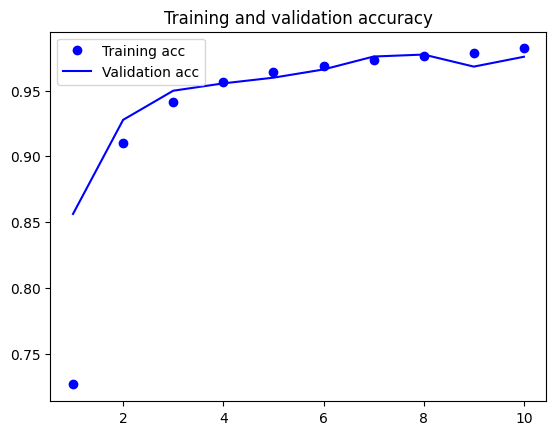

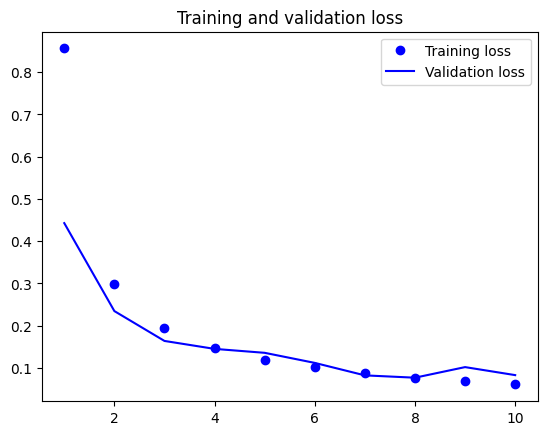

In [32]:
#plot accuracy and loss
acc= history.history['accuracy'] 
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [33]:
#get final loss and accuracy
final_loss,final_accuracy=model.evaluate(test_data,test_labels)

#print results in percentage form
print("final loss: {:.2f}%".format(final_loss*100))
print("final accuracy: {:.2f}%".format(final_accuracy*100))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9700 - loss: 0.1006
final loss: 8.32%
final accuracy: 97.52%


# BI-DIRECTIONAL RNN(B-RNN)


In [34]:
import cv2
import numpy as np
import glob
import os
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Bidirectional

In [35]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [36]:
# Load genuine signature paths
gen_sign = (glob.glob('Dataset_Signature_Final/Dataset/dataset1/real/*.*') +
            glob.glob('Dataset_Signature_Final/Dataset/dataset2/real/*.*') +
            glob.glob('Dataset_Signature_Final/Dataset/dataset3/real/*.*') +
            glob.glob('Dataset_Signature_Final/Dataset/dataset4/real1/*.*'))

# Load forged signature paths
forg_sign = (glob.glob('Dataset_Signature_Final/Dataset/dataset1/forge/*.*') +
             glob.glob('Dataset_Signature_Final/Dataset/dataset2/forge/*.*') +
             glob.glob('Dataset_Signature_Final/Dataset/dataset3/forge/*.*') +
             glob.glob('Dataset_Signature_Final/Dataset/dataset4/forge/*.*'))




In [37]:
# Split the data into train and test (80% train, 20% test) 
train_ratio= 0.8
train_gen_sign = gen_sign[:int(len(gen_sign) *train_ratio)]
test_gen_sign = gen_sign [int (len(gen_sign) *train_ratio):]

train_forg_sign =forg_sign[:int(len(forg_sign) *train_ratio)]
test_forg_sign = forg_sign [int (len(forg_sign) * train_ratio):]
train_image_paths = train_gen_sign + train_forg_sign 
test_image_paths =test_gen_sign + test_forg_sign

In [38]:
def preprocess_image(image_path,img_size=(128,128),patch_size=(128,128)):
    img=cv2.imread(image_path,cv2.IMREAD_GRAYSCALE) #read in grayscale
    if img is None:
        raise ValueError(f"failed to load image:{image_path}")
    img=cv2.resize(img,img_size)
    return img_to_patches(img,patch_size)
def img_to_patches(img,patch_size=(256,256)):
    patches=[]
    for i in range(0,img.shape[0],patch_size[0]):
        for j in range(0,img.shape[1],patch_size[1]):
            patch=img[i:i+patch_size[0],j:j+patch_size[1]].flatten()#flatten each path
            patches.append(patch)
    return np.array(patches)

In [39]:
def process_images(image_paths,label):
    X_data=[]
    y_data=[]
    for image_path in image_paths:
        try:
            patches=preprocess_image(image_path)
            X_data.append(patches)
            y_data.append(label)
        except Exception as e:
            print(f"error processing{image_path}: {e}")
    return np.array(X_data),np.array(y_data)


In [40]:
import os
from PIL import Image

# Define the path to the directory containing your images
image_directory = 'Dataset_Signature_Final/Dataset/dataset4/real1/'

# Define a set of valid image extensions
valid_image_extensions = {'.png', '.jpg', '.jpeg', '.bmp', '.gif'}

# Loop through all files in the directory
for filename in os.listdir(image_directory):
    # Get the file extension
    file_extension = os.path.splitext(filename)[1].lower()  # Get extension and convert to lowercase

    # Check if the file is an image based on its extension
    if file_extension in valid_image_extensions:
        try:
            img_path = os.path.join(image_directory, filename)
            img = Image.open(img_path)
            # Perform your processing here
            print(f"Successfully processed image: {filename}")
        except Exception as e:
            print(f"Error loading {filename}: {e}")
    else:
        print(f"Skipping non-image file: {filename}")



Successfully processed image: 00201002.png
Successfully processed image: 00202002.png
Successfully processed image: 00203002.png
Successfully processed image: 00204002.png
Successfully processed image: 00205002.png
Successfully processed image: 00801008.png
Successfully processed image: 00802008.png
Successfully processed image: 00803008.png
Successfully processed image: 00804008.png
Successfully processed image: 00805008.png
Successfully processed image: 01601016.png
Successfully processed image: 01602016.png
Successfully processed image: 01603016.png
Successfully processed image: 01604016.png
Successfully processed image: 01605016.png
Successfully processed image: 02401024.png
Successfully processed image: 02402024.png
Successfully processed image: 02403024.png
Successfully processed image: 02404024.png
Successfully processed image: 02405024.png
Successfully processed image: 03301033.png
Successfully processed image: 03302033.png
Successfully processed image: 03303033.png
Successfull

In [41]:
# Create training dataset
X_train_real, y_train_real = process_images (train_gen_sign, label=0) 
X_train_forg, y_train_forg = process_images (train_forg_sign, label=1)

# Create test dataset
# 0 for real
# 1 for forged
X_test_real, y_test_real = process_images (test_gen_sign, label=0) # 0 for real
X_test_forg, y_test_forg =process_images (test_forg_sign, label=1) # 1 for forged

# Combine real and forged data
X_train = np.concatenate([X_train_real, X_train_forg], axis=0) 
y_train = np.concatenate([y_train_real, y_train_forg], axis=0)

X_test =  np.concatenate([X_test_real, X_test_forg], axis=0)
y_test=np.concatenate([y_test_real, y_test_forg], axis=0)
# Shuffle the training data
indices = np.random.permutation (len(X_train))
X_train = X_train[indices]
y_train = y_train[indices]

#shuffle test data
test_indices=np.random.permutation(len(X_test))
X_test=X_test[test_indices]
y_test=y_test[test_indices]

In [42]:
print("X_train shape:",X_train.shape)
print("y_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_test shape:",X_test.shape)

X_train shape: (576, 1, 16384)
y_train shape: (576, 1, 16384)
X_test shape: (144, 1, 16384)
y_test shape: (144, 1, 16384)


In [43]:
timesteps=X_train.shape[1]#number of patches per image
features=X_train.shape[2]#number of features per patch

y_train=to_categorical(y_train,num_classes=2)
y_test=to_categorical(y_test,num_classes=2)

In [44]:
model=Sequential([
    Bidirectional(LSTM(64,return_sequences=False),input_shape=(timesteps,features)),
    Dense(64,activation='relu'),
    Dense(2,activation='softmax')#2 classes:genuine and forged
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 128)            │     8,421,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,430,274 (32.16 MB)

 Trainable params: 8,430,274 (32.16 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.save('bi_rnn_signature_verification_model.h5')

In [47]:
history=model.fit(X_train,y_train,batch_size=32,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.5300 - loss: 0.7147 - val_accuracy: 0.5208 - val_loss: 0.6935
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.5117 - loss: 0.7023 - val_accuracy: 0.5000 - val_loss: 0.6951
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.5188 - loss: 0.6991 - val_accuracy: 0.5000 - val_loss: 0.6981
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.5061 - loss: 0.6987 - val_accuracy: 0.5000 - val_loss: 0.6968
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.4830 - loss: 0.6962 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.4865 - loss: 0.6954 - val_accuracy: 0.5347 - val_loss: 0.6927
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.4753 - loss: 0.6943 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.4811 - loss: 0.6969 - val_accuracy: 0.

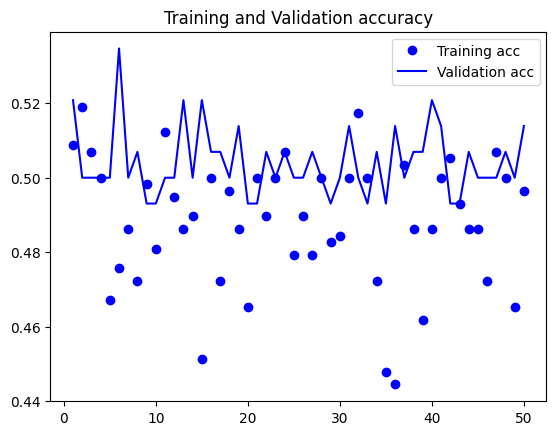

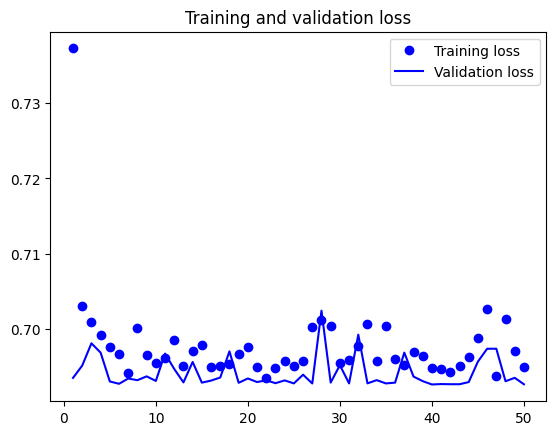

In [48]:
import matplotlib.pyplot as plt
#plot accuracy and loss
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len (acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b',label='Validation acc') 
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
